In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler

In [38]:
data= pd.read_csv("creditcard.csv")

In [55]:
data.shape

(11664, 32)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11664 entries, 0 to 11663
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              11664 non-null  int64  
 1   V1                11664 non-null  float64
 2   V2                11664 non-null  float64
 3   V3                11664 non-null  float64
 4   V4                11664 non-null  float64
 5   V5                11664 non-null  float64
 6   V6                11664 non-null  float64
 7   V7                11664 non-null  float64
 8   V8                11664 non-null  float64
 9   V9                11664 non-null  float64
 10  V10               11664 non-null  float64
 11  V11               11664 non-null  float64
 12  V12               11664 non-null  float64
 13  V13               11664 non-null  float64
 14  V14               11664 non-null  float64
 15  V15               11664 non-null  float64
 16  V16               11664 non-null  float6

In [39]:
missing_values = data.isnull().sum()
print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [46]:
data =data.dropna()

In [47]:
genuine_count = data[data['Class'] == 0]['Class'].count()
fraud_count = data[data['Class'] == 1]['Class'].count()
fraud_percentage = (fraud_count / (genuine_count + fraud_count)) * 100

print("Number of genuine transactions:", genuine_count)
print("Number of fraud transactions:", fraud_count)
print("Percentage of fraud transactions:", fraud_percentage)


Number of genuine transactions: 11615
Number of fraud transactions: 49
Percentage of fraud transactions: 0.4200960219478738


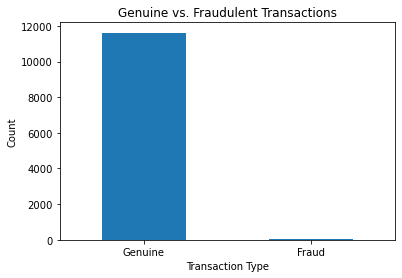

In [48]:
import matplotlib.pyplot as plt

transaction_counts = data['Class'].value_counts()
transaction_counts.plot(kind='bar', rot=0)
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Genuine vs. Fraudulent Transactions")
plt.xticks([0, 1], ['Genuine', 'Fraud'])
plt.show()


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['NormalizedAmount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))


In [50]:
from sklearn.model_selection import train_test_split

X = data.drop(['Class'], axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)


RandomForestClassifier()

In [52]:
decision_tree_predictions = decision_tree.predict(X_test)
random_forest_predictions = random_forest.predict(X_test)


In [53]:
decision_tree_accuracy = decision_tree.score(X_test, y_test)
random_forest_accuracy = random_forest.score(X_test, y_test)

print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)


Decision Tree Accuracy: 0.9985714285714286
Random Forest Accuracy: 0.9991428571428571


In [54]:
from sklearn.metrics import classification_report

decision_tree_report = classification_report(y_test, decision_tree_predictions)
random_forest_report = classification_report(y_test, random_forest_predictions)

print("Decision Tree Performance Metrics:")
print(decision_tree_report)
print("\nRandom Forest Performance Metrics:")
print(random_forest_report)


Decision Tree Performance Metrics:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3484
         1.0       0.82      0.88      0.85        16

    accuracy                           1.00      3500
   macro avg       0.91      0.94      0.92      3500
weighted avg       1.00      1.00      1.00      3500


Random Forest Performance Metrics:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3484
         1.0       0.93      0.88      0.90        16

    accuracy                           1.00      3500
   macro avg       0.97      0.94      0.95      3500
weighted avg       1.00      1.00      1.00      3500

